To model the pharmacokinetics of a multi-dose compartment model, we start by treating the drug administration as Dirac pulses [(Hacisalihzade & Mansour, 1985)](https://www.sciencedirect.com/science/article/pii/002071018590073X).

# Pulse-Response

Define $u(t)$ as the drug administration function, by modeling the administration of $n$ doses as Dirac pulses, we have $$u(t)=\sum_{i=1}^nd_i\delta(t-\tau_i),$$ where $d_i$ is the reference dose. Further define $y(t)$ the plasma concentration of the drug as a function of $u(t)$, given by the convolution between the drug administration function $u(t)$ and dose-response $D(t)$

\begin{align*}
    y(t):=u\star D(t)&=\int_0^tu(\tau)D(t-\tau)~\operatorname{d\tau}\\
    &=\int_0^t\sum_{i=1}^nd_i\delta(\tau-\tau_i)D(t-\tau)~\operatorname{d\tau}\\
    &=\sum_{i=1}^nd_i\int_0^t\delta(\tau-\tau_i)D(t-\tau)~\operatorname{d\tau}\\
    &=\sum_{i=1}^nd_iD(t-\tau_i),
\end{align*}
[where](https://discord.com/channels/438306949285806082/438308040446574592/1199919251767697518) $D(t-\tau_i)$ is the weight of the Dirac pulses $\delta(t-\tau_i)$, i.e., $D(t-\tau_i)$ is the theoretical pulse response and is nothing else but the time history of the drug's blood concentration after a drug administration $u(t)$ at $\tau_i$.

# The Multi-Dose 3-Compartment Model

The general multi-dose 3-compartment model [is then given by](https://discord.com/channels/438306949285806082/438308040446574592/1199925107221594222)

\begin{align*}
    \dot B(t) &= u(t) - k_1B(t) = \sum_{i=1}^nd_i\delta(t-\tau_i)-k_1B(t), \\
    \dot A_{\rm eff}(t) &= k_1 B(t) - k_2 A_{\rm eff}(t), \\
    \dot E_2(t) &= k_2 A_{\rm eff}(t) - k_3 E_2(t),
\end{align*}

- where $B(t)$ is the diffusion of the drug from depot to blood (previously in the [Single-Dose 3-Compartment model](1_Serum_Estradiol_Single-Dose_3-Compartment.ipynb), we used $D(t)$, but we saw from the fitted model for $100\rm~\mu g$ Mylan Estradiol TDP that $D(t=0)$ is [not](https://discord.com/channels/438306949285806082/438308040446574592/1200606417250431107) the dosage since we [left](https://discord.com/channels/438306949285806082/438308040446574592/1200568615255146646) unit conversions to the fitting parameters);
- The impulse response (drug administration) is [described](https://discord.com/channels/438306949285806082/438308040446574592/1201305896177901668) by the superposition of Dirac deltas, with $B(t_0)=d_0$ the initial dose (or [equivalently](https://discord.com/channels/438306949285806082/438308040446574592/1201302487886471269) having $d_0\delta(t-t_0)$ at initial time $t_0$);
- $d_i$ is the reference dose at time $t_i$ that we will get out from the fit;
- The rest of the terms have the same meaning as before (see the [Single-Dose 3-Compartment model](1_Serum_Estradiol_Single-Dose_3-Compartment.ipynb)).

Under Laplace transform, we find that

\begin{align*}
    s\hat B(s)-B(t_0) &= \mathcal{L}\left[u(t)\right]-k_1\hat B(s), \\
    s\hat A_{\rm eff}(s)-A_{\rm eff}(t_0) &= k_1\hat B(s)-k_2\hat A_{\rm eff}(s), \\
    s\hat E_2(s)-E_2(t_0) &= k_2\hat A_{\rm eff}(s) - k_3\hat E_2(s),
\end{align*}

where $\mathcal{L}[u(t)]$ is given by

\begin{align*}
    \mathcal{L}\left[u(t)\right]&=\mathcal{L}\left[\sum_{i=1}^nd_i\delta(t-t_i)\right] \\
    &=\mathcal{L}\left[\int_0^t\sum_{i=1}^nd_i\delta(t-t_i)e^{-st}~\operatorname{dt}\right] \\
    &=\sum_{i=1}^nd_ie^{-st_i}.
\end{align*}

Thus, our multi-dose system in Laplace space is given by

\begin{align*}
    (s+k_1)\hat B(s) &= B(t_0)+\sum_{i=1}^nd_ie^{-st_i}, \\
    -k_1\hat B(s) + (s+k_2)\hat A_{\rm eff}(s) &= A_{\rm eff}(t_0), \\
    -k_2\hat A_{\rm eff}(s) + (s+k_3)\hat E_2(s) &= E_2(t_0).
\end{align*}

Rewriting in matrix notation, we have

$$\begin{bmatrix}s+k_1 & 0 & 0 \\ -k_1 & s+k_2 & 0 \\ 0 & -k_2 & s+k_3\end{bmatrix}\begin{bmatrix}\hat B(s) \\ \hat A_{\rm eff}(s) \\ \hat E_2(s)\end{bmatrix}=\begin{bmatrix}B(t_0)+\sum d_ie^{-st_i} \\ A_{\rm eff}(t_0) \\ E_2(t_0) \end{bmatrix}.$$

By Cramer's rule, we find the solutions in Laplace space:

\begin{align*}
    \hat B(s)&=\frac{\operatorname{det}\left|\begin{matrix}B(t_0)+\sum d_ie^{-st_i} & 0 & 0 \\ A_{\rm eff}(t_0) & s+k_2 & 0 \\ E_2(t_0) & -k_2 & s+k_3 \end{matrix}\right|}{\operatorname{det}\left|\begin{matrix}s+k_1 & 0 & 0 \\ -k_1 & s+k_2 & 0 \\ 0 & -k_2 & s+k_3\end{matrix}\right|}=\frac1{s+k_1}\left[B(t_0)+\sum_{i=1}^nd_ie^{-st_i}\right],\\ \\
    \hat A_{\rm eff}(s)&=\frac{\operatorname{det}\left|\begin{matrix}s+k_1 & B(t_0)+\sum d_ie^{-st_i} & 0 \\ -k_1 & A_{\rm eff}(t_0) & 0 \\ 0 & E_2(t_0) & s+k_3 \end{matrix}\right|}{\operatorname{det}\left|\begin{matrix}s+k_1 & 0 & 0 \\ -k_1 & s+k_2 & 0 \\ 0 & -k_2 & s+k_3\end{matrix}\right|}=\frac{k_1B(t_0)}{(s+k_1)(s+k_2)}+\frac{k_1\sum d_ie^{-st_i}}{(s+k_1)(s+k_2)}+\frac{A_{\rm eff}(t_0)}{s+k_2},\\ \\
    \hat E_2(s)&=\frac{\operatorname{det}\left|\begin{matrix}s+k_1 & 0 & B(t_0)+\sum d_ie^{-st_i} \\ -k_1 & s+k_2 & A_{\rm eff}(t_0) \\ 0 & -k_2 & E_2(t_0) \end{matrix}\right|}{\operatorname{det}\left|\begin{matrix}s+k_1 & 0 & 0 \\ -k_1 & s+k_2 & 0 \\ 0 & -k_2 & s+k_3\end{matrix}\right|}=\frac{k_1k_2}{(s+k_1)(s+k_2)(s+k_3)}\left[B(t_0)+\sum_{i=1}^n d_ie^{-st_i}\right]+\frac{k_2A_{\rm eff}(t_0)}{(s+k_2)(s+k_3)}+\frac{E_2(t_0)}{s+k_3}.
\end{align*}

# Inverse Laplace Transformation by Contour Integration and the Theory of Residues

The general method [(Tang-2, Eq 6.124, p. 332)](https://link.springer.com/book/10.1007/978-3-540-30270-4) for taking the inverse Laplace transform of the Laplace space solution $\hat F(s)$ is by contour integrating $\hat F(s)\to\hat F(z)$ in the complex plane (I'm doing this to "build character", as JJE once said to the whole class)

\begin{align*}
    \mathcal{L}^{-1}\left[\hat F(s)\right]&=\frac1{2\pi i}\oint_cF(z)e^{zt}~\operatorname{dz}\\
    &=\sum_j\operatorname{Res}_{z=z_j}\left[F(z)e^{zt}\right],
\end{align*} where $z_j$ is a singularity of $F(z)e^{zt}$ in the complex plane.

We can find the residue of $h(z)$ at a simple pole $z_0$ by [(Tang-1, Sect. 3.4.1, p. 141)](https://link.springer.com/book/10.1007/978-3-540-30274-2) $$\operatorname{Res}_{z=z_0}\left[g(z)\right]\equiv a_{-1}=\lim_{z\to z_0}(z-z_0)g(z),$$ where $a_{-1}$ is the $z^{-1}$ term in the Laurent series expansion of $h(z)$ around $z=z_0$.

## Solutions

### Solution to the Drug Diffusion $B(t)$ into the Bloodstream

We start with $B(t)$, where $\hat B(s)=\frac1{s+k_1}\left[B(t_0)+\sum_{i=1}^nd_ie^{-st_i}\right]$:

\begin{align*}
    B(t)=\mathcal{L}^{-1}\left[\hat B(s)\right]&=\frac1{2\pi i}\oint_c\frac1{z+k_1}\left[B(t_0)+\sum_{i=1}^nd_ie^{-zt_i}\right]e^{zt}\operatorname{dz}\\
    &=\frac1{2\pi i}\oint_c\frac1{z+k_1}\left[B(t_0)e^{zt}+\sum_{i=1}^nd_ie^{z(t-t_i)}\right]\operatorname{dz},
\end{align*} for some appropriately choosen contour $c$ that we are not going to worry about.

Here, we have a simple pole at $z=-k_1$. Thus, by the theory of residues, we have

\begin{align*}
    \mathcal{L}^{-1}\left[\hat B(s)\right]&=\operatorname{Res}_{z=-k_1}\left\{\frac1{z+k_1}\left[B(t_0)e^{zt}+\sum_{i=1}^nd_ie^{z(t-t_i)}\right]\right\}\\
    &=\lim_{z\to-k_1}\left\{\cancel{\frac{z+k_1}{z+k_1}}\left[B(t_0)e^{zt}+\sum_{i=1}^nd_ie^{z(t-t_i)}\right]\right\}\\
    &=B(t_0)e^{-k_1t}+\sum_{i=1}^nd_ie^{-k_1(t-t_i)}.
\end{align*}

The above solution is valid for $t_0=0$ and $t>0$. Because of the summation of $t_i$ where we have Dirac pulses $\delta(t-t_i)$ , in addition to the [problem](https://discord.com/channels/438306949285806082/438308040446574592/1201917148080111646) that [if](https://discord.com/channels/438306949285806082/438308040446574592/1201993130493358211) $t<0$, $e^{-k_1t}\to\infty$, we [thus require](https://discord.com/channels/438306949285806082/438308040446574592/1201299068115243048)

\begin{align*}
    B(t)&=\sum_iB(t_i)H(t-t_i)e^{-k_1(t-t_i)}+\sum_{i=1}^nd_iH(t-t_i)e^{-k_1(t-t_i)}\\
    &=\sum_{i=1}^nD(t_i)H(t-t_i)e^{-k_1(t-t_i)}
\end{align*}

where $H(t-t_i)$ is the Heaviside function that [returns](https://discord.com/channels/438306949285806082/1201973466845151362/1201989590488186891) $H(t-t_i)=1$ for $t\ge t_i$ and $H(t-t_i)=0$ otherwise; $D(t_i)=B(t_i)+d(t_i)$ with $d(t_i)\equiv d_i$.

### Solution to the Effect Compartment $A_{\rm eff}(t)$ ([Skin](https://discord.com/channels/438306949285806082/438308040446574592/1201379821607981136) Reservoir)

Next for $\hat A_{\rm eff}=\frac{k_1B(t_0)}{(s+k_1)(s+k_2)}+\frac{k_1\sum d_ie^{-st_i}}{(s+k_1)(s+k_2)}+\frac{A_{\rm eff}(t_0)}{s+k_2}$, the inverse Laplace transform is given by

\begin{align*}
    A_{\rm eff}(t)=\mathcal{L}^{-1}\left[\hat A_{\rm eff}(s)\right]&=\frac1{2\pi i}\oint_c\frac{k_1B(t_0)e^{zt}}{(z+k_1)(z+k_2)}\operatorname{dz}+\frac1{2\pi i}\oint_c\frac{k_1\sum d_ie^{z(t-t_i)}}{(z+k_1)(z+k_2)}\operatorname{dz}+\frac1{2\pi i}\oint_c\frac{A_{\rm eff}(t_0)e^{zt}}{z+k_2}\operatorname{dz}\\
    &=\sum_{j=1}^2\operatorname{Res}_j\left[\frac{k_1B(t_0)e^{zt}}{(z+k_1)(z+k_2)}\right]+\sum_{j=1}^2\operatorname{Res}_j\left[\frac{k_1\sum d_ie^{z(t-t_i)}}{(z+k_1)(z+k_2)}\right]+\operatorname{Res}_{z=-k_2}\left[\frac{A_{\rm eff}(t_0)e^{zt}}{z+k_2}\right]\\
    &=\lim_{z\to-k_1}\cancel{(z+k_1)}\left[\frac{k_1B(t_0)e^{zt}}{\cancel{(z+k_1)}(z+k_2)}\right]+\lim_{z\to-k_2}\cancel{(z+k_2)}\left[\frac{k_1B(t_0)e^{zt}}{(z+k_1)\cancel{(z+k_2)}}\right]\\
    &~~~~+\lim_{z\to-k_1}\cancel{(z+k_1)}\left[\frac{k_1\sum d_ie^{z(t-t_i)}}{\cancel{(z+k_1)}(z+k_2)}\right]+\lim_{z\to-k_2}\cancel{(z+k_2)}\left[\frac{k_1\sum d_ie^{z(t-t_i)}}{(z+k_1)\cancel{(z+k_2)}}\right]\\
    &~~~~+\lim_{z\to-k_2}\cancel{(z+k_2)}\left[\frac{A_{\rm eff}(t_0)e^{zt}}{\cancel{z+k_2}}\right]\\
    &=\frac{k_1B(t_0)}{(-k_1+k_2)}e^{-k_1t}+\frac{k_1B(t_0)}{(k_1-k_2)}e^{-k_2t}+\frac{k_1\sum d_iH(t-t_i)}{-k_1+k_2}e^{-k_1(t-t_i)}+\frac{k_1\sum d_iH(t-t_i)}{k_1-k_2}e^{-k_2(t-t_i)}+A_{\rm eff}(t_0)e^{-k_2t}\\
    &=-\frac{k_1B(t_0)}{k_1-k_2}e^{-k_1t}+\frac{k_1B(t_0)}{k_1-k_2}e^{-k_2t}-\frac{k_1\sum d_iH(t-t_i)}{k_1-k_2}e^{-k_1(t-t_i)}+\frac{k_1\sum d_iH(t-t_i)}{k_1-k_2}e^{-k_2(t-t_i)}+A_{\rm eff}(t_0)e^{-k_2t}\\
    &=\frac{k_1B(t_0)}{k_1-k_2}\left[-e^{-k_1t}+e^{-k_2t}\right]+\frac{k_1\sum d_iH(t-t_i)}{k_1-k_2}\left[-e^{-k_1(t-t_i)}+e^{-k_2(t-t_i)}\right]+A_{\rm eff}(t_0)e^{-k_2t}.
\end{align*}

Again, the above is true for $t_0=0$ and $t>0$. In general, we have

\begin{align*}
    A_{\rm eff}(t)&=\frac{k_1}{k_1-k_2}\sum_{i=1}^n B(t_i)H(t-t_i)\left[-e^{-k_1(t-t_i)}+e^{-k_2(t-t_i)}\right]\\
    &~~~~+\frac{k_1}{k_1-k_2}\sum d_iH(t-t_i)\left[-e^{-k_1(t-t_i)}+e^{-k_2(t-t_i)}\right]\\
    &~~~~+\sum_{i=1}^nA_{\rm eff}(t_i)H(t-t_i)e^{-k_2(t-t_i)}\\
    &=\frac{k_1}{k_1-k_2}\sum_{i=1}^n D(t_i)H(t-t_i)\left[-e^{-k_1(t-t_i)}+e^{-k_2(t-t_i)}\right]+\sum_{i=1}^nA_{\rm eff}(t_i)H(t-t_i)e^{-k_2(t-t_i)}.
\end{align*}

### Solution to Serum Estradiol $E_2(t)$

Finally for $\hat E_2(s)=\frac{k_1k_2}{(s+k_1)(s+k_2)(s+k_3)}\left[B(t_0)+\sum_{i=1}^n d_ie^{-st_i}\right]+\frac{k_2A_{\rm eff}(t_0)}{(s+k_2)(s+k_3)}+\frac{E_2(t_0)}{s+k_3}$ where we have the inverse Laplace transform via contour integration

\begin{align*}
    E_2(t)=\mathcal{L}^{-1}\left[\hat E_2(s)\right]&=\frac1{2\pi i}\oint_c\frac{k_1k_2}{(z+k_1)(z+k_2)(z+k_3)}\left[B(t_0)e^{zt}+\sum_{i=1}^n d_ie^{z(t-t_i)}\right]\\
    &~~~~+\frac1{2\pi i}\oint_c\frac{k_2A_{\rm eff}(t_0)e^{zt}\operatorname{dz}}{(z+k_2)(z+k_3)}+\frac1{2\pi i}\oint_c\frac{E_2(t_0)e^{zt}}{z+k_3}\operatorname{dz}\\
    &=\sum_{j=1}^3\operatorname{Res}_{z=-k_j}\left[\frac{k_1k_2B(t_0)e^{zt}}{(z+k_1)(z+k_2)(z+k_3)}+\frac{k_1k_2\sum d_ie^{z(t-t_i)}}{(z+k_1)(z+k_2)(z+k_3)}\right]\\
    &~~~~+\sum_{j=2}^3\operatorname{Res}_{z=-k_j}\left[\frac{k_2A_{\rm eff}(t_0)e^{zt}}{(z+k_2)(z+k_3)}\right]+\operatorname{Res}_{z=-k_3}\left[\frac{E_2(t_0)e^{zt}}{z+k_3}\right]\\
    &=\lim_{z\to-k_1}\left[\frac{k_1k_2B(t_0)e^{zt}}{(z+k_2)(z+k_3)}+\frac{k_1k_2\sum d_ie^{z(t-t_i)}}{(z+k_2)(z+k_3)}\right]+\lim_{z\to-k_2}\left[\frac{k_1k_2B(t_0)e^{zt}}{(z+k_1)(z+k_3)}+\frac{k_1k_2\sum d_ie^{z(t-t_i)}}{(z+k_1)(z+k_3)}\right]+\lim_{z\to-k_3}\left[\frac{k_1k_2B(t_0)e^{zt}}{(z+k_1)(z+k_2)}+\frac{k_1k_2\sum d_ie^{z(t-t_i)}}{(z+k_1)(z+k_2)}\right]\\
    &~~~~+\lim_{z\to-k_2}\left[\frac{k_2A_{\rm eff}(t_0)e^{zt}}{(z+k_3)}\right]+\lim_{z\to-k_3}\left[\frac{k_2A_{\rm eff}(t_0)e^{zt}}{(z+k_2)}\right]+\lim_{z\to-k_3}E_2(t_0)e^{zt}\\
    &=k_1k_2B(t_0)\left[\frac{e^{-k_1t}}{(k_1-k_2)(k_1-k_3)} - \frac{e^{-k_2t}}{(k_1-k_2)(k_2-k_3)} + \frac{e^{-k_3t}}{(k_1-k_3)(k_2-k_3)}\right]\\
    &~~~~+k_1k_2\sum_{i=1}^nd_iH(t-t_i)\left[\frac{e^{-k_1(t-t_i)}}{(k_1-k_2)(k_1-k_3)} - \frac{e^{-k_2(t-t_i)}}{(k_1-k_2)(k_2-k_3)} + \frac{e^{-k_3(t-t_i)}}{(k_1-k_3)(k_2-k_3)}\right]\\
    &~~~~+\frac{k_2A_{\rm eff}(t_0)}{k_2-k_3}\left[-e^{-k_2t}+e^{-k_3t}\right]+E_2(t_0)e^{-k_3t}.
\end{align*}

Again, the above form is valid for $t_0=0$ and $t>0$. More [generally](https://discord.com/channels/438306949285806082/1201973466845151362/1201990605597581312), we have

\begin{align*}
    E_2(t)&=k_1k_2\sum_{i=1}^nD(t_i)H(t-t_i)\left[\frac{e^{-k_1(t-t_i)}}{(k_1-k_2)(k_1-k_3)} - \frac{e^{-k_2(t-t_i)}}{(k_1-k_2)(k_2-k_3)} + \frac{e^{-k_3(t-t_i)}}{(k_1-k_3)(k_2-k_3)}\right]\\
    &~~~~+\frac{k_2}{k_2-k_3}\sum_{i=1}^nA_{\rm eff}(t_i)H(t-t_i)\left[-e^{-k_2(t-t_i)}+e^{-k_3(t-t_i)}\right]+\sum_{i=1}^nE_2(t_i)H(t-t_i)e^{-k_3(t-t_i)},
\end{align*}

where $D(t_i)=B(t_i)+d_i$ and $d_i\equiv d(t_i)$.

# Bayesian Inference via Markov Chain Monte Carlo Sampling

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from lmfit import Model
#from scipy.optimize import curve_fit    # least squares method won't give a good fit
import lmfit

# maximum likelihood fitting via mcmc
# https://stackoverflow.com/questions/77496325/how-to-do-an-mcmc-fitting-using-only-a-subset-of-variables-of-a-function
from scipy.stats import norm    # ln(Gaussian) will be our likelihood function
import emcee
import corner

In [ ]:
# import and visualize data

MylanTDPDays100 = np.genfromtxt('Data/DailyMed_MylanTDP_n36/MylanTDP_n36_100mcg.csv', delimiter=',', skip_header=True)
MylanTDPDays50 = np.genfromtxt('Data/DailyMed_MylanTDP_n36/MylanTDP_n36_50mcg.csv', delimiter=',', skip_header=True)
MylanTDPDays25 = np.genfromtxt('Data/DailyMed_MylanTDP_n36/MylanTDP_n36_25mcg.csv', delimiter=',', skip_header=True)

H2003aN30Estradot100 = np.genfromtxt('Data/Hossain2003a_Estradot_n30/H2003a_Estradot_n30_100mcg.csv', delimiter=',', skip_header=True)
H2003aN30Estradot50 = np.genfromtxt('Data/Hossain2003a_Estradot_n30/H2003a_Estradot_n30_50mcg.csv', delimiter=',', skip_header=True)
H2003aN30Estradot37_5 = np.genfromtxt('Data/Hossain2003a_Estradot_n30/H2003a_Estradot_n30_37.5mcg.csv', delimiter=',', skip_header=True)
H2003aN30Estradot25 = np.genfromtxt('Data/Hossain2003a_Estradot_n30/H2003a_Estradot_n30_25mcg.csv', delimiter=',', skip_header=True)

H2003bN11Estradot100 = np.genfromtxt('Data/Hossain2003b_Estradot_n11/H2003b_Estradot_n11_100mcg.csv', delimiter=',', skip_header=True)
H2003bN11Estradot50 = np.genfromtxt('Data/Hossain2003b_Estradot_n11/H2003b_Estradot_n11_50mcg.csv', delimiter=',', skip_header=True)

# exclude n = 30 study from H2003b due to the initial measurement being higher than the second measurement
#H2003bN30Estradot50 = np.genfromtxt('Data/Hossain2003b_Estradot_n30/H2003b_Estradot_n30_50mcg.csv', delimiter=',', skip_header=True)

In [ ]:
# convert Mylan data from days to hrs, Estradot data is already in hrs
# https://stackoverflow.com/questions/10394659/how-to-add-a-calculated-computed-column-in-numpy

MylanTDP100 = np.vstack((MylanTDPDays100[:,0]*24, MylanTDPDays100[:,1])).T
MylanTDP50 = np.vstack((MylanTDPDays50[:,0]*24, MylanTDPDays50[:,1])).T
MylanTDP25 = np.vstack((MylanTDPDays25[:,0]*24, MylanTDPDays25[:,1])).T

In [ ]:
# fitting using single-dose model

def E2Dose(t, d0, k1, k2, k3):
    summation = 0
    innerFunc1 = np.exp(-k1 * t) / ((k1 - k2) * (k1 - k3))
    innerFunc2 = np.exp(-k2 * t) / ((k1 - k2) * (k2 - k3))
    innerFunc3 = np.exp(-k3 * t) / ((k1 - k3) * (k2 - k3))
    summation = d0 * (innerFunc1 - innerFunc2 + innerFunc3)
    return k1 * k2 * summation

# A_{\rm eff}(t_0) term

def AEff(t, Aeff0, k2, k3):
    summationEff = 0
    innerFunc1Eff = np.exp(-k2 * t)
    innerFunc2Eff = np.exp(-k3 * t)
    summationEff = Aeff0 *(-innerFunc1Eff + innerFunc2Eff)
    return k2 * summationEff / (k2 - k3)

# E2(t_0) term

def E2(t, E20, k3):
    return E20 * np.exp(-k3 * t)

def E2Full(t, d0, Aeff0, E20, k1, k2, k3):
    return E2Dose(t, d0, k1, k2, k3) + AEff(t, Aeff0, k2, k3) + E2(t, E20, k3)

In [ ]:
Mylan100Model = Model(E2Full)
print(f'parameter names: {Mylan100Model.param_names}')
print(f'independent variables: {Mylan100Model.independent_vars}')

parameter names: ['d0', 'Aeff0', 'E20', 'k1', 'k2', 'k3']
independent variables: ['t']


In [ ]:
# k_i can be greater than 1, from the likelihood surface using emcee in the single-dose model

Mylan100Params = Mylan100Model.make_params(d0=dict(value=100,min=0,max=250),
                                           Aeff0=dict(value=0,min=0,max=50),
                                           E20=dict(value=MylanTDP100[:,1][0],min=0,max=50),
                                           k1=dict(value=1/(100/24),min=0.1,max=0.4),
                                           k2=dict(value=2,min=0,max=10),
                                           k3=dict(value=1/37,min=0.01,max=0.1))
#Mylan100Model.set_param_hint('ti', vary=False)

# need some extra help from lmfit to make theta usable with mcmc
Mylan100Fit = Mylan100Model.fit(data=MylanTDP100[:,1], params=Mylan100Params, t=MylanTDP100[:,0])

In [ ]:
# https://lmfit.github.io/lmfit-py/examples/example_emcee_Model_interface.html
# burn means it's discarding the first 500 iterations/samples, and ...
# ... thin means its keeping every 20th sample, i.e. (10,000 - 500)/20 = 475, ...
# ... from result_emcee.lnprob.shape: (475, 100)
# see https://lmfit.github.io/lmfit-py/fitting.html#lmfit.minimizer.Minimizer.emcee

emcee_kws = dict(steps=10000, burn=500, thin=20, is_weighted=False)
emcee_params = Mylan100Fit.params.copy()

# __lnsigma is the log of the standard deviation, here ~50 to 100, https://discord.com/channels/438306949285806082/438308040446574592/1200639243274440735
# __lnsigma characterizes the width/average error between the curves and the datapoints
# here, they also used the log trick to enforce the constraint that the standard deviation sigma should always be greater than 0
# it's the sigma in the gaussian model sum over datapoints (xi, ti)  exp(-1/2(xi - e2(ti, D0, k1, k2, k3))^2/sigma^2)/sqrt(2pi sigma^2)
# and they parametrize sigma = exp(__lnsigma)
# so a large sigma is more permissive in terms of the square error (xi - e2)^2, it penalizes large difference between the datapoint and the curve less.

emcee_params.add('__lnsigma', value=np.log(0.1), min=np.log(0.001), max=np.log(50))

In [ ]:
result_emcee = Mylan100Model.fit(data=MylanTDP100[:,1], t=MylanTDP100[:,0],
                                 params=emcee_params, method='emcee',
                                 nan_policy='omit', fit_kws=emcee_kws)

100%|█████████████████████████████████████| 10000/10000 [01:47<00:00, 93.22it/s]


The chain is shorter than 50 times the integrated autocorrelation time for 6 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 200;
tau: [224.63192534 284.52890063 540.81770963 369.0297727  432.80614971
 283.97459759 108.975735  ]


<matplotlib.legend.Legend>

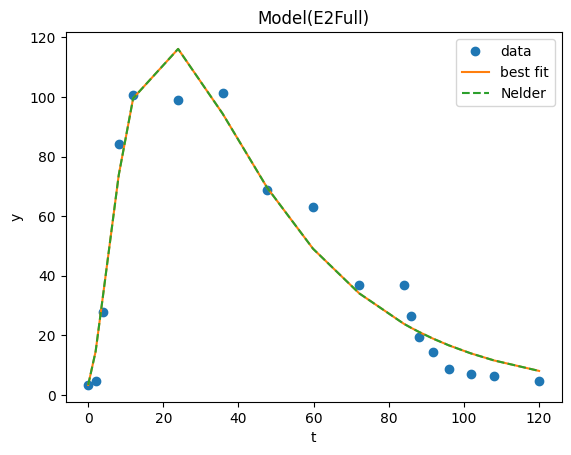

In [ ]:
result_emcee.plot_fit()
plt.plot(MylanTDP100[:,0], Mylan100Model.eval(params=result_emcee.params, t=MylanTDP100[:,0]), '--', label='Nelder')
plt.legend()

In [ ]:
lmfit.report_fit(result_emcee)
#emcee_corner = corner.corner(result_emcee.flatchain, labels=result_emcee.var_names,
#                             truths=list(result_emcee.params.valuesdict().values()))

[[Fit Statistics]]
    # fitting method   = emcee
    # function evals   = 1000000
    # data points      = 18
    # variables        = 7
    chi-square         = 13.9973441
    reduced chi-square = 1.27248583
    Akaike info crit   = 9.47292527
    Bayesian info crit = 15.7055276
    R-squared          = 0.99938245
[[Variables]]
    d0:         175.761115 +/- 28.3182762 (16.11%) (init = 198.3756)
    Aeff0:      19.3224375 +/- 17.0093267 (88.03%) (init = 0.1262881)
    E20:        3.36479681 +/- 4.11259161 (122.22%) (init = 1.136691e-06)
    k1:         0.26153570 +/- 0.11611270 (44.40%) (init = 0.4)
    k2:         0.11151365 +/- 0.07198839 (64.56%) (init = 0.09694597)
    k3:         0.03018746 +/- 0.00499364 (16.54%) (init = 0.02992559)
    __lnsigma:  2.20072548 +/- 0.19410976 (8.82%) (init = -2.302585)
[[Correlations]] (unreported correlations are < 0.100)
    C(d0, k3)         = +0.8177
    C(k1, k2)         = -0.6177
    C(k2, k3)         = -0.4681
    C(Aeff0, k2)      = -0.36

In [ ]:
highest_prob = np.argmax(result_emcee.lnprob)
hp_loc = np.unravel_index(highest_prob, result_emcee.lnprob.shape)
mle_soln = result_emcee.chain[hp_loc]
print("\nMaximum Likelihood Estimation (MLE):")
print('----------------------------------')
for ix, param in enumerate(emcee_params):
    if ix<7:
        print(f"{param}: {mle_soln[ix]:.3f}")
    else:
        pass

emcee_params


Maximum Likelihood Estimation (MLE):
----------------------------------
d0: 200.214
Aeff0: 1.195
E20: 0.157
k1: 0.387
k2: 0.096
k3: 0.031
__lnsigma: 2.011


name,value,standard error,relative error,initial value,min,max,vary
d0,198.375626,176.991023,(89.22%),100,0.00000000,250.000000,True
Aeff0,0.12628811,6996933.83,(5540453199.65%),0,0.00000000,50.0000000,True
E20,1.1367e-06,9.42706723,(829342640.73%),3.4129692832764533,0.00000000,50.0000000,True
k1,0.40000000,0.00421107,(1.05%),0.24,0.10000000,0.40000000,True
k2,0.09694597,0.06182250,(63.77%),2,0.00000000,10.0000000,True
k3,0.02992559,0.00648318,(21.66%),0.02702702702702703,0.01000000,0.10000000,True
__lnsigma,-2.30258509,,,-2.3025850929940455,-6.90775528,3.91202301,True


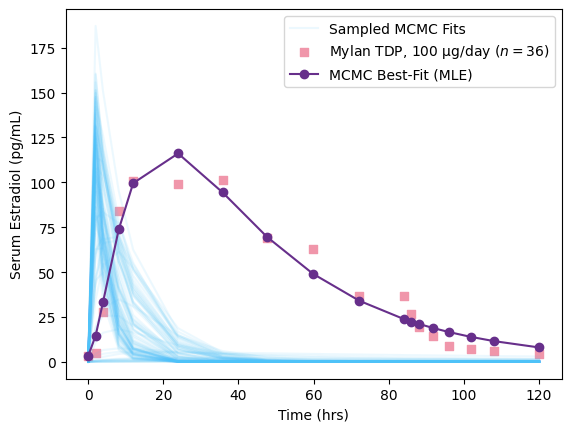

In [ ]:
inds = np.random.randint(len(result_emcee.flatchain), size=100)

for ind in inds:
    sample = (result_emcee.flatchain["d0"][ind], result_emcee.flatchain["Aeff0"][ind],
              result_emcee.flatchain["E20"][ind], result_emcee.flatchain["k1"][ind],
              result_emcee.flatchain["k2"][ind], result_emcee.flatchain["k3"][ind])
    plt.plot(MylanTDP100[:,0], E2Dose(MylanTDP100[:,0], sample[0], sample[1], sample[2], sample[3]), alpha=0.1, color='#4EC2F8')
plt.plot(MylanTDP100[:,0], E2Dose(MylanTDP100[:,0], sample[0], sample[1], sample[2], sample[3]), alpha=0.1, color='#4EC2F8', label='Sampled MCMC Fits')
plt.scatter(MylanTDP100[:,0], MylanTDP100[:,1], color='#F096AA', marker='s', label="Mylan TDP, 100 $\\rm\\mu g$/day ($n=36$)")
plt.plot(MylanTDP100[:,0], result_emcee.best_fit, label='MCMC Best-Fit (MLE)', color='#672F8B', marker='o')
plt.xlabel('Time (hrs)')
plt.ylabel('Serum Estradiol (pg/mL)')
plt.legend()
plt.show()

The full multi-dose model seems to have overcomplicated a few things. Would an explicit prior make the MCMC move better?

In [ ]:
# https://github.com/obscode/FlyingCircus/blob/master/MoreNotebooks/ModelFitting/Emcee.ipynb
# https://prappleizer.github.io/Tutorials/MCMC/MCMC_Tutorial_Solution.html

## Bayes’ Rule

Denote the parameters of interest as $\theta$ (generally a vector) and let $y$ be the observed data (again a vector with each unit $i$ given by $y_i$), then Bayes’ rule gives us $$p(\theta,y)=p(\theta)\cdot p(y|\theta),$$ where $p(\theta)$ is the prior distribution that depends on our knowledge of the parameters $\theta$; $p(y|\theta)$ is the likelihood function, which is a function of $\theta$ that tells us the chance of obtaining the observation $y$ and, in general, is not a distribution.

The posterior distribution (density) $p(\theta|y)$ is then given by $$p(\theta|y)=\frac{p(\theta,y)}{p(y)}=\frac{p(\theta)\cdot p(y|\theta)}{p(y)},$$ which is the normalized $p(\theta,y)$ that gives us the probability interpretation.

`emcee` takes in the natural log of $p(\theta,y)$, so we will use $$\ln[p(\theta|y)]\propto\ln[p(\theta)\cdot p(y|\theta)],$$ where we will [ignore](https://stats.stackexchange.com/questions/85465/theoretically-why-do-we-not-need-to-compute-a-marginal-distribution-constant-fo) the marginal (or prior predictive, [Bayesian Data Analysis textbook by Gelman, 3rd edition](http://www.stat.columbia.edu/~gelman/)) distribution $p(y)$ that depends only on the data $y$, which only contributes to a proportionality constant under natural log.

In [ ]:
def E2FullMCMC(t, theta):
    d0, Aeff0, E20, k1, k2, k3 = theta

    summation = 0
    innerFunc1 = np.exp(-k1 * t) / ((k1 - k2) * (k1 - k3))
    innerFunc2 = np.exp(-k2 * t) / ((k1 - k2) * (k2 - k3))
    innerFunc3 = np.exp(-k3 * t) / ((k1 - k3) * (k2 - k3))
    summation = d0 * (innerFunc1 - innerFunc2 + innerFunc3)

    summationEff = 0
    innerFunc1Eff = np.exp(-k2 * t)
    innerFunc2Eff = np.exp(-k3 * t)
    summationEff = Aeff0 *(-innerFunc1Eff + innerFunc2Eff)

    return k1 * k2 * summation + k2 * summationEff / (k2 - k3) + E20 * np.exp(-k3 * t)

We require
- The initial dose $d(t_i)\equiv d_i>0$;
- Estradiol diffusion rate from DOT matrix pockets to skin $k_1>0$ and (the initial guess of) $k_1$ should be the inverse of the amount of estradiol released by a given patch (e.g., for $100\rm~\mu g/day$ Mylan Estradiol TDP, $k_1=1/(100/24)\rm~day/\mu g$);
- Estradiol diffusion rate from the skin to the bloodstream $k_2>0$;
- Estradiol elimination rate plus unbinding rate from Estrogen Receptor (ER) $k_3>0$, with the initial guess to be based on the [elimination half-life of transdermal estradiol](https://en.wikipedia.org/wiki/Pharmacokinetics_of_estradiol) $\tau_{1/2}=37\rm~hours\implies k_3=1/37\rm~hours^{-1}$;
- We fix the initial value for the effect (skin) compartment $A_{\rm eff}(t_i)\ge0$ to be zero (we assume patches are taken off and new patches placed at new sites, so there shouldn't be anything stored by the skin);
- We further fix the initial estradiol serum level $E_2(t_i)\ge0$ and set it to the serum concentration at the initial time for all our data.

We will use weakly informative prior distributions for our fitting parameters (Bayesian Data Analysis, 3rd Ed, Sect. 2.9). Doing the above gives us the prior $\ln[p(\theta)]$:

In [ ]:
# prior function

def lnprior(theta):
    d0, Aeff0, E20, k1, k2, k3 = theta
    if d0 <= 0 or d0 > 300 or Aeff0 < 0 or Aeff0 > d0 or E20 < 0 or E20 > d0 or k1 < 0.1 or k1 > 0.5 or k2 <= 0 or k2 > 10 or k3 < 0.01 or k3 > 0.1:
        return -np.inf    # \equiv \ln(0)
    return 0    # \equiv \ln(1)

For the likelihood function $p(y_i|\theta)$, we will use the [Gaussian distribution](https://en.wikipedia.org/wiki/Normal_distribution#With_unknown_mean_and_unknown_variance) $\mathcal{N}(\theta|\mu,\sigma^2)$ from `scipy.stats` such that $$p(y_i|\theta)=\mathcal{N}\Big[y_i\Big|\mu=y_i-\operatorname{E_2}(t,\theta),\sigma^2=\sqrt{y_i}\Big].$$

Then for the entire data set under log, we have $$\ln\Big[p(y|\theta)\Big]=\sum_i\ln\Big[p(y_i|\theta)\Big]=\sum_i\ln\Bigg\{\mathcal{N}\Big[y_i\Big|\mu=y_i-\operatorname{E_2}(t,\theta),\sigma^2=\sqrt{y_i}\Big]\Bigg\}.$$

In [ ]:
def lnlike(theta, t, y):
    #d0, Aeff0, E20, k1, k2, k3 = theta
    #xin = data[:,0]
    #yin = data[:,1]
    return np.sum(norm.logpdf(y, loc=E2FullMCMC(t, theta), scale=np.sqrt(y)))

In [ ]:
lnlike((245.8499,0,MylanTDPDays100[:,1][0],0.0541,27,0.0381), MylanTDP100[:,0], MylanTDP100[:,1])

-115.56118444732866

Finally, we have the posterior distribution $$\ln[p(\theta|y)]\propto\ln[p(\theta)\cdot p(y|\theta)]:$$

In [ ]:
def lnpost(theta, t, y):
    #d0, Aeff0, E20, k1, k2, k3 = theta
    lnpriorout = lnprior(theta)
    if not np.isfinite(lnpriorout):
        return -np.inf
    return lnpriorout + lnlike(theta, t, y)

In [ ]:
p0Mylan100 = np.array([100, 0, MylanTDPDays100[:,1][0], 1/(100/24), 2, 1/37])

In [ ]:
p0Mylan100

array([1.00000000e+02, 0.00000000e+00, 3.41296928e+00, 2.40000000e-01,
       2.00000000e+00, 2.70270270e-02])

In [ ]:
lnpost(p0Mylan100, MylanTDP100[:,0], MylanTDP100[:,1])

-204.40783140947272

In [ ]:
nwalkers = 128
niter = 10000    # number of iterations
ndim = len(p0Mylan100)

# perturb the estimate for each walker
# https://github.com/dfm/emcee/issues/378
p0Mylan100MCMC = [p0Mylan100 + 1e-7*np.random.randn(ndim)*p0Mylan100 for i in range(nwalkers)]

# https://emcee.readthedocs.io/en/stable/user/sampler/
# args (Optional) – A list of extra positional arguments for log_prob_fn. ...
# ... log_prob_fn will be called with the sequence log_pprob_fn(p, *args, **kwargs).
samplerMylan100 = emcee.EnsembleSampler(nwalkers, ndim, lnpost, #pool=pool,
                                        args=(MylanTDP100[:,0], MylanTDP100[:,1]))

In [ ]:
def runEmcee(theta, nwalkers, niter, lnpost, yin):
    ndim = len(theta)
    sampler = emcee.EnsembleSampler(nwalkers, ndim, lnpost, #pool=pool,
                                    args=(yin[:,0], yin[:,1]))
    p0 = [theta + 1e-7*np.random.randn(ndim)*theta for i in range(nwalkers)]

    print("Initial Burn-In Run...")
    p0, _, _ = sampler.run_mcmc(p0, 100, skip_initial_state_check=True, progress=True)
    sampler.reset()

    print("Running MCMC...")
    pos, prob, state = sampler.run_mcmc(p0, niter, skip_initial_state_check=True, progress=True)

    return sampler, pos, prob, state

In [ ]:
sampler, pos, prob, state = runEmcee(p0Mylan100, nwalkers, niter, lnpost, MylanTDP100)

Initial Burn-In Run...


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 40.12it/s]


Running MCMC...


100%|█████████████████████████████████████| 10000/10000 [02:51<00:00, 58.30it/s]


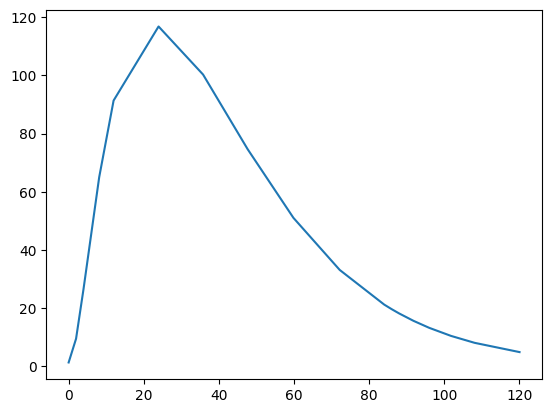

Theta max:  [2.97638135e+02 0.00000000e+00 1.35242525e+00 3.42351066e-01
 5.53834911e-02 4.73685502e-02]


In [ ]:
samples = sampler.flatchain

theta_max  = samples[np.argmax(sampler.flatlnprobability)]
best_fit_model = E2FullMCMC(MylanTDP100[:,0], theta_max)
plt.plot(MylanTDP100[:,0],best_fit_model,label='Highest Likelihood Model')
plt.show()
print('Theta max: ',theta_max)

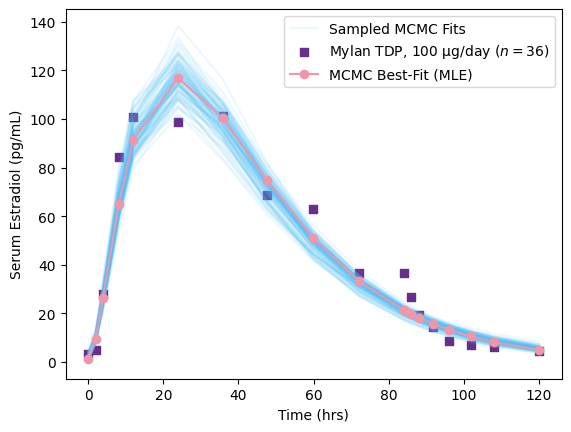

In [ ]:
inds = np.random.randint(len(sampler.flatchain), size=100)

for ind in inds:
    sample = (sampler.flatchain[ind][0], sampler.flatchain[ind][1],
              sampler.flatchain[ind][2], sampler.flatchain[ind][3],
              sampler.flatchain[ind][4], sampler.flatchain[ind][5])
    plt.plot(MylanTDP100[:,0], E2FullMCMC(MylanTDP100[:,0], (sample[0], sample[1], sample[2], sample[3], sample[4], sample[5])), alpha=0.1, color='#4EC2F8')
plt.plot(MylanTDP100[:,0], E2FullMCMC(MylanTDP100[:,0], (sample[0], sample[1], sample[2], sample[3], sample[4], sample[5])), alpha=0.1, color='#4EC2F8', label='Sampled MCMC Fits')
plt.scatter(MylanTDP100[:,0], MylanTDP100[:,1], color='#672F8B', marker='s', label="Mylan TDP, 100 $\\rm\\mu g$/day ($n=36$)")
plt.plot(MylanTDP100[:,0], best_fit_model, label='MCMC Best-Fit (MLE)', color='#F096AA', marker='o')
plt.xlabel('Time (hrs)')
plt.ylabel('Serum Estradiol (pg/mL)')
plt.legend()
plt.show()

We can see from the above plot that with a proper prior, `emcee` can produce a good result even though we have two parameters ($A_{\rm eff}(t_0)$ and $E_2(t_0)$) that are not really needed, as we will see in [the Steady-State notebook](3_Steady-State_Multi-Dose_3-Compartment.ipynb).

We will use `lmfit` for our model fittings from now on (instead of using emcee directly), given that `lmfit` automatically generates various fitting statistics for us.